In [98]:
#import libraries:
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as dt
from matplotlib import style
import numpy as np
style.use('seaborn-darkgrid')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import dexplot as dxp
from mizani.formatters import percent_format

In [5]:
#read in dataset:
heart = pd.read_csv("heart_disease.csv")
heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
#determine if there are any missing values:
heart.isnull().sum().sum()

0

In [77]:
#create dataframe of continuous predictors:
heart_cont = heart[["HeartDiseaseorAttack", "BMI", "MentHlth", "PhysHlth","Age","Education", "Income","GenHlth"]]

#create dataframe of categorical/ordinal variables:
heart_cat = heart[heart.columns.difference(["BMI", "MentHlth", "PhysHlth","Age","Education", "Income","GenHlth"])].apply(lambda x: x.astype("category"))

heart_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   AnyHealthcare         253680 non-null  category
 1   CholCheck             253680 non-null  category
 2   Diabetes              253680 non-null  category
 3   DiffWalk              253680 non-null  category
 4   Fruits                253680 non-null  category
 5   HeartDiseaseorAttack  253680 non-null  category
 6   HighBP                253680 non-null  category
 7   HighChol              253680 non-null  category
 8   HvyAlcoholConsump     253680 non-null  category
 9   NoDocbcCost           253680 non-null  category
 10  PhysActivity          253680 non-null  category
 11  Sex                   253680 non-null  category
 12  Smoker                253680 non-null  category
 13  Stroke                253680 non-null  category
 14  Veggies               253680 non-nul

# Continuous Predictors:

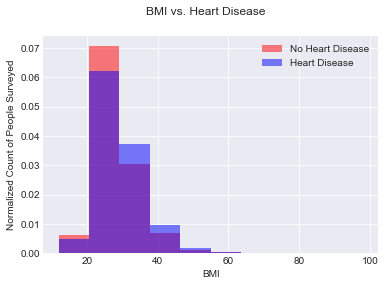

In [8]:
#histogram of bmi and target variable:
fig1,ax1 = plt.subplots()

#set up histograms:
ax1.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["BMI"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax1.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["BMI"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax1.set_xlabel("BMI")
ax1.set_ylabel("Normalized Count of People Surveyed")
fig1.suptitle("BMI vs. Heart Disease")

ax1.legend();

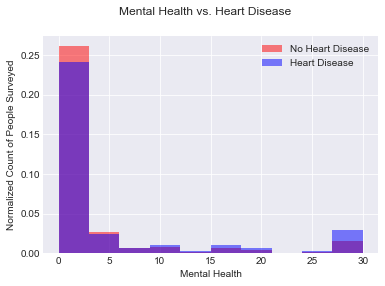

In [9]:
#histogram of mental health and target variable:
fig2,ax2 = plt.subplots()

#set up histograms:
ax2.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["MentHlth"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax2.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["MentHlth"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax2.set_xlabel("Mental Health")
ax2.set_ylabel("Normalized Count of People Surveyed")
fig2.suptitle("Mental Health vs. Heart Disease")

ax2.legend();

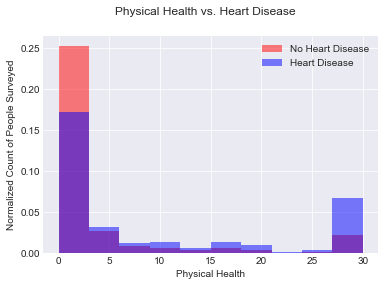

In [10]:
#histogram of physical health and target variable:
fig3,ax3 = plt.subplots()

#set up histograms:
ax3.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["PhysHlth"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax3.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["PhysHlth"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax3.set_xlabel("Physical Health")
ax3.set_ylabel("Normalized Count of People Surveyed")
fig3.suptitle("Physical Health vs. Heart Disease")

ax3.legend();

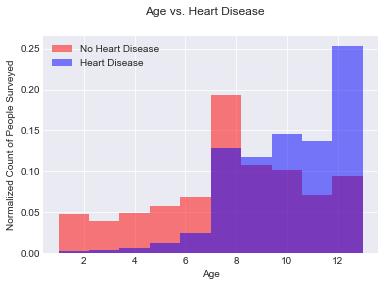

In [11]:
#histogram of Age and target variable:
fig4,ax4 = plt.subplots()

#set up histograms:
ax4.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["Age"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax4.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["Age"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax4.set_xlabel("Age")
ax4.set_ylabel("Normalized Count of People Surveyed")
fig4.suptitle("Age vs. Heart Disease")

ax4.legend();

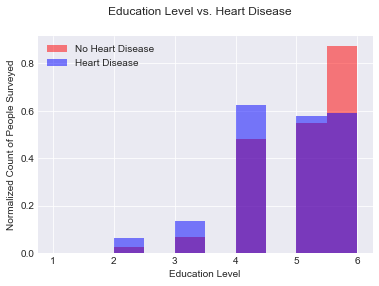

In [12]:
#histogram of Age and target variable:
fig5,ax5 = plt.subplots()

#set up histograms:
ax5.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["Education"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax5.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["Education"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax5.set_xlabel("Education Level")
ax5.set_ylabel("Normalized Count of People Surveyed")
fig5.suptitle("Education Level vs. Heart Disease")

ax5.legend();

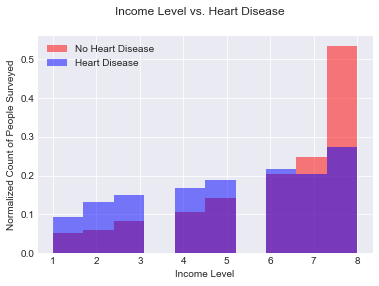

In [13]:
#histogram of Age and target variable:
fig6,ax6 = plt.subplots()

#set up histograms:
ax6.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["Income"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax6.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["Income"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax6.set_xlabel("Income Level")
ax6.set_ylabel("Normalized Count of People Surveyed")
fig6.suptitle("Income Level vs. Heart Disease")

ax6.legend();

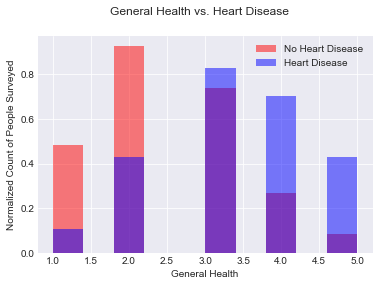

In [14]:
#histogram of General Health and target variable:
fig7,ax7 = plt.subplots()

#set up histograms:
ax7.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 0]["GenHlth"],alpha = 0.5, color = "red", label="No Heart Disease",density=True)
ax7.hist(heart_cont[heart_cont["HeartDiseaseorAttack"] == 1]["GenHlth"],alpha = 0.5, color = "blue", label = "Heart Disease",density=True)

#format axes:
ax7.set_xlabel("General Health")
ax7.set_ylabel("Normalized Count of People Surveyed")
fig7.suptitle("General Health vs. Heart Disease")

ax7.legend();

Observations:

- For higher BMI values (roughly above 30), it appears that there is a higher proportion of individuals with heart disease, perhaps implying that higher BMI leads to increased risk of heart disease?
- For the mental health variable, there appears to be a larger proportion of individuals that experienced heart disease as the number of bad mental health days (>10) increased. However, this appears to be a relatively small proportion of the dataset.
- Physical health also appears to increase the risk of heart disease, especially when the number of bad physical health days is larger than 5.
- It should be noted that for the physical health and mental health, the number of days is the number of days out of the previous 30 days, so this variable does not exceed 30 in value.
- The number of people with heart disease seems to increase as age increases.
- Higher rates of heart disease at lower levels of achieved education and income level.
- Heart disease seems to be more prevelent among those who report fair or poor general health.


# Categorical Predictors:
Note that the y axes of the following plots are proportions of each x value with respect to the target variable, HeartDiseaseorAttack.

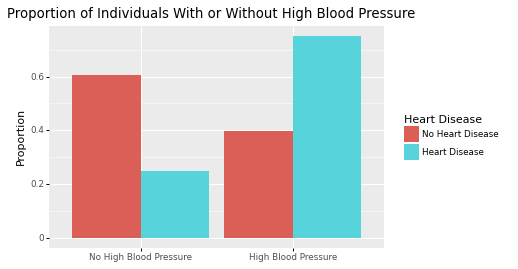

<ggplot: (137283556922)>

In [116]:
#plot of high blood pressure vs heart disease:
p8 = p9.ggplot(data=heart_cat)
p8 += p9.aes(x = "HighBP", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p8 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p8 += p9.ggtitle("Proportion of Individuals With or Without High Blood Pressure")
p8 += p9.scale_x_discrete(labels = ["No High Blood Pressure", "High Blood Pressure"])
p8 += p9.ylab("Proportion")
p8 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p8 += p9.labs(x = "", fill = "Heart Disease")
p8

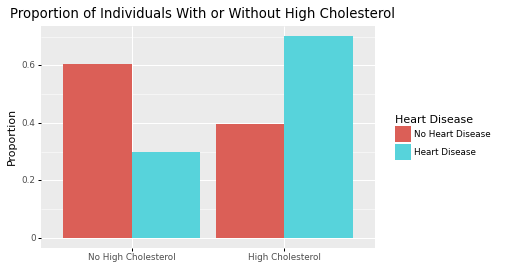

<ggplot: (137276526285)>

In [117]:
#plot of high cholesterol vs heart disease:

p10 = p9.ggplot(data=heart_cat)
p10 += p9.aes(x = "HighChol", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p10 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p10 += p9.ggtitle("Proportion of Individuals With or Without High Cholesterol")
p10 += p9.scale_x_discrete(labels = ["No High Cholesterol", "High Cholesterol"])
p10 += p9.ylab("Proportion")
p10 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p10 += p9.labs(x = "", fill = "Heart Disease")
p10

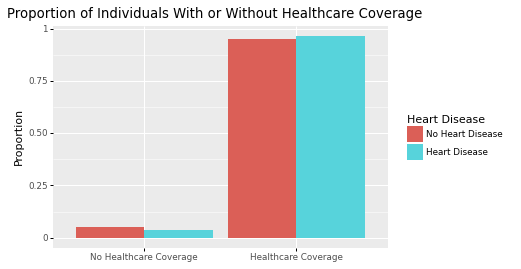

<ggplot: (137276348447)>

In [119]:
#plot of healthcare vs heart disease:
p11 = p9.ggplot(data=heart_cat)
p11 += p9.aes(x = "AnyHealthcare", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p11 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p11 += p9.ggtitle("Proportion of Individuals With or Without Healthcare Coverage")
p11 += p9.scale_x_discrete(labels = ["No Healthcare Coverage", "Healthcare Coverage"])
p11 += p9.ylab("Proportion")
p11 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p11 += p9.labs(x = "", fill = "Heart Disease")
p11

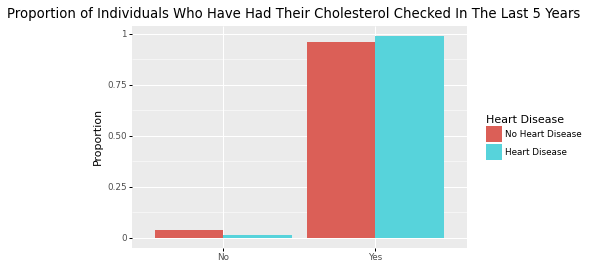

<ggplot: (137269144092)>

In [121]:
#plot of cholesterol check vs heart disease:
p12 = p9.ggplot(data=heart_cat)
p12 += p9.aes(x = "CholCheck", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p12 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p12 += p9.ggtitle("Proportion of Individuals Who Have Had Their Cholesterol Checked In The Last 5 Years")
p12 += p9.scale_x_discrete(labels = ["No", "Yes"])
p12 += p9.ylab("Proportion")
p12 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p12 += p9.labs(x = "", fill = "Heart Disease")
p12

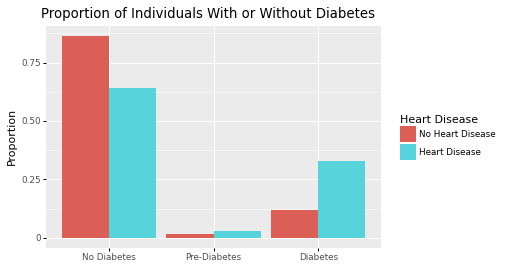

<ggplot: (137276467700)>

In [123]:
#plot of Diabetes vs heart disease:

p13 = p9.ggplot(data=heart_cat)
p13 += p9.aes(x = "Diabetes", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p13 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p13 += p9.ggtitle("Proportion of Individuals With or Without Diabetes")
p13 += p9.scale_x_discrete(labels = ["No Diabetes", "Pre-Diabetes", "Diabetes"])
p13 += p9.ylab("Proportion")
p13 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p13 += p9.labs(x = "", fill = "Heart Disease")
p13

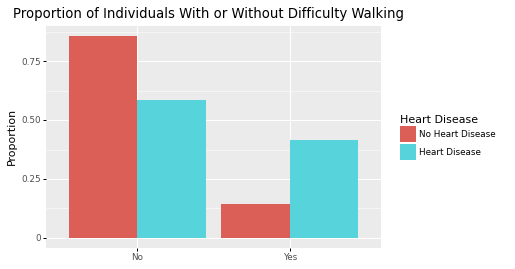

<ggplot: (137276288660)>

In [124]:
#plot of Difficulty Walking vs heart disease:
p14 = p9.ggplot(data=heart_cat)
p14 += p9.aes(x = "DiffWalk", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p14 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p14 += p9.ggtitle("Proportion of Individuals With or Without Difficulty Walking")
p14 += p9.scale_x_discrete(labels = ["No", "Yes"])
p14 += p9.ylab("Proportion")
p14 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p14 += p9.labs(x = "", fill = "Heart Disease")
p14

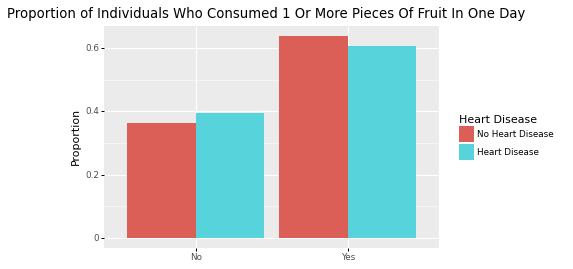

<ggplot: (137276360346)>

In [126]:
#Plot of Eating Fruit vs Heart Disease:
p15 = p9.ggplot(data=heart_cat)
p15 += p9.aes(x = "Fruits", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p15 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p15 += p9.ggtitle("Proportion of Individuals Who Consumed 1 Or More Pieces Of Fruit In One Day")
p15 += p9.scale_x_discrete(labels = ["No", "Yes"])
p15 += p9.ylab("Proportion")
p15 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p15 += p9.labs(x = "", fill = "Heart Disease")
p15


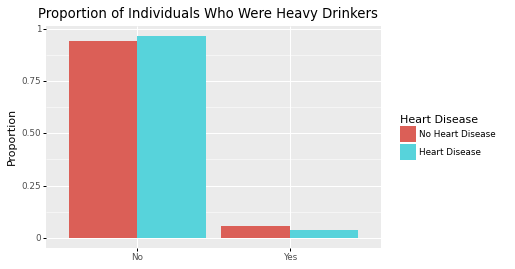

<ggplot: (137268842596)>

In [128]:
#Plot of heavy alcohol consumption vs heart disease:
p16 = p9.ggplot(data=heart_cat)
p16 += p9.aes(x = "HvyAlcoholConsump", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p16 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p16 += p9.ggtitle("Proportion of Individuals Who Were Heavy Drinkers")
p16 += p9.scale_x_discrete(labels = ["No", "Yes"])
p16 += p9.ylab("Proportion")
p16 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p16 += p9.labs(x = "", fill = "Heart Disease")
p16

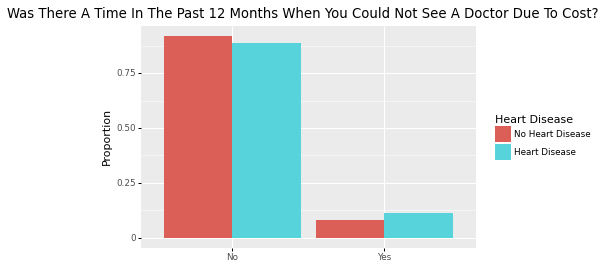

<ggplot: (137284827892)>

In [130]:
#plot of medical cost vs heart disease:
p17 = p9.ggplot(data=heart_cat)
p17 += p9.aes(x = "NoDocbcCost", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p17 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p17 += p9.ggtitle("Was There A Time In The Past 12 Months When You Could Not See A Doctor Due To Cost?")
p17 += p9.scale_x_discrete(labels = ["No", "Yes"])
p17 += p9.ylab("Proportion")
p17 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p17 += p9.labs(x = "", fill = "Heart Disease")
p17

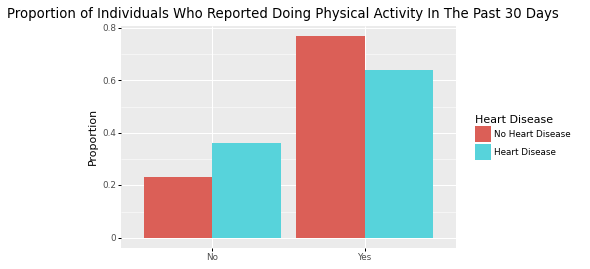

<ggplot: (137283600101)>

In [131]:
#plot of physical activity vs heart disease:
p18 = p9.ggplot(data=heart_cat)
p18 += p9.aes(x = "PhysActivity", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p18 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p18 += p9.ggtitle("Proportion of Individuals Who Reported Doing Physical Activity In The Past 30 Days")
p18 += p9.scale_x_discrete(labels = ["No", "Yes"])
p18 += p9.ylab("Proportion")
p18 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p18 += p9.labs(x = "", fill = "Heart Disease")
p18

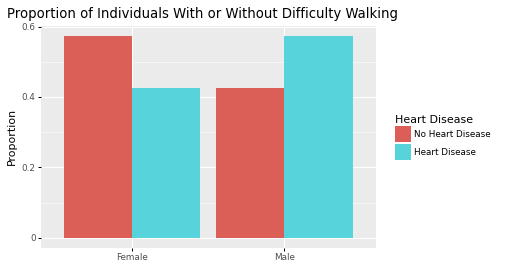

<ggplot: (137268891215)>

In [132]:
#plot of sex vs heart disease:
p19 = p9.ggplot(data=heart_cat)
p19 += p9.aes(x = "Sex", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p19 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p19 += p9.ggtitle("Proportion of Individuals With or Without Difficulty Walking")
p19 += p9.scale_x_discrete(labels = ["Female", "Male"])
p19 += p9.ylab("Proportion")
p19 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p19 += p9.labs(x = "", fill = "Heart Disease")
p19

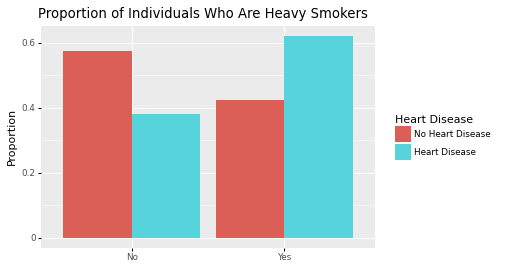

<ggplot: (137268903283)>

In [133]:
#plot of smoking habit vs heart disease:
p20 = p9.ggplot(data=heart_cat)
p20 += p9.aes(x = "Smoker", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p20 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p20 += p9.ggtitle("Proportion of Individuals Who Are Heavy Smokers")
p20 += p9.scale_x_discrete(labels = ["No", "Yes"])
p20 += p9.ylab("Proportion")
p20 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p20 += p9.labs(x = "", fill = "Heart Disease")
p20

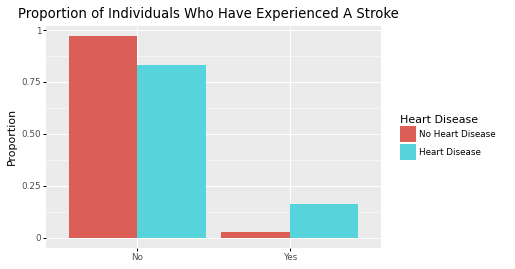

<ggplot: (137279531524)>

In [134]:
#plot of stroke vs heart disease:
p21 = p9.ggplot(data=heart_cat)
p21 += p9.aes(x = "Stroke", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p21 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p21+= p9.ggtitle("Proportion of Individuals Who Have Experienced A Stroke")
p21 += p9.scale_x_discrete(labels = ["No", "Yes"])
p21 += p9.ylab("Proportion")
p21 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p21 += p9.labs(x = "", fill = "Heart Disease")
p21

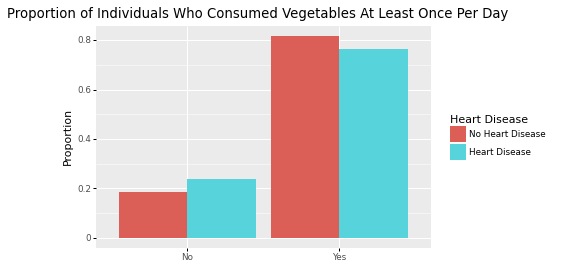

<ggplot: (137284879535)>

In [135]:
#plot of eating vegetables vs heart disease:
dxp.count("Veggies",  data = heart_cat, split = "HeartDiseaseorAttack", normalize = "HeartDiseaseorAttack")
p22 = p9.ggplot(data=heart_cat)
p22 += p9.aes(x = "Veggies", fill = "HeartDiseaseorAttack", group = "HeartDiseaseorAttack")
p22 += p9.stat_count(p9.aes(y = p9.after_stat("prop")),position = "dodge")
p22 += p9.ggtitle("Proportion of Individuals Who Consumed Vegetables At Least Once Per Day")
p22 += p9.scale_x_discrete(labels = ["No", "Yes"])
p22 += p9.ylab("Proportion")
p22 += p9.scale_fill_discrete(labels = ["No Heart Disease", "Heart Disease"])
p22 += p9.labs(x = "", fill = "Heart Disease")
p22